# Exploration of Heteromotility classification of cell type - preliminary data from one experiment, one image, one timepoint (17 mes, 17 ep)

Ran @JacobKimmel's Heteromotility analysis with a sliding window of 20 tp's on m05s01 and m05s07 tracks (tracks were created manually)

I limited the tracks to cells that were in the frame for the entire movie, so there are <20 of each.

In [1]:
from sklearn import datasets, svm, metrics
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_context('poster')

In [10]:
mlFeats=pd.read_csv('data/m05/tracks/motility_statistics_m05_s01_s07_SW20.csv', index_col='cell_id')
target_names = np.array(['mes_s01', 'ep_s07'])

In [11]:
mlFeats.head()

,total_distance,net_distance,linearity,spearmanrsq,progressivity,max_speed,min_speed,avg_speed,MSD_slope,hurst_RS,...,mean_theta_10_6,min_theta_10_6,max_theta_10_6,mean_theta_11_5,min_theta_11_5,max_theta_11_5,mean_theta_11_6,min_theta_11_6,max_theta_11_6,label
cell_id,,,,,,,,,,,,,,,,,,,,,
0,548.967513,57.000000,0.002565,0.003900,0.103831,15.401299,0.200000,7.624549,1.255431,0.741457,...,1.154993,0.037374,2.352156,1.003384,0.060390,2.737469,0.867074,0.107529,1.980526,0
1,486.057242,126.649122,0.556478,0.296436,0.260564,15.926079,0.282843,6.750795,1.292228,0.814534,...,0.881768,0.026945,2.253182,0.741559,0.035342,2.167995,0.692941,0.006410,2.105122,0
2,571.478975,167.672299,0.065742,0.003932,0.293401,13.146863,0.282843,7.937208,1.463021,0.863494,...,0.847862,0.214547,2.667485,0.836489,0.117255,2.633837,0.868301,0.070461,2.598514,0
3,523.939375,42.941821,0.260112,0.242700,0.081960,8.400000,0.200000,7.276936,0.838334,0.826648,...,0.899340,0.017235,2.330895,1.062916,0.040659,2.559655,1.009232,0.152124,2.377847,0
4,484.989737,63.348244,0.001221,0.005527,0.130618,6.965630,0.200000,6.735969,0.828655,0.823151,...,0.863119,0.181006,1.809431,0.939273,0.012925,2.311202,0.916776,0.024368,2.069000,0


In [12]:
feats_grouped=mlFeats.groupby("label")

In [13]:
feats_grouped

In [14]:
mlFeats.columns.values

array(['total_distance', 'net_distance', 'linearity', 'spearmanrsq',
       'progressivity', 'max_speed', 'min_speed', 'avg_speed', 'MSD_slope',
       'hurst_RS', 'nongauss', 'disp_var', 'disp_skew', 'rw_linearity',
       'rw_netdist', 'rw_kurtosis01', 'rw_kurtosis02', 'rw_kurtosis03',
       'rw_kurtosis04', 'rw_kurtosis05', 'rw_kurtosis06', 'rw_kurtosis07',
       'rw_kurtosis08', 'rw_kurtosis09', 'rw_kurtosis10',
       'avg_moving_speed01', 'avg_moving_speed02', 'avg_moving_speed03',
       'avg_moving_speed04', 'avg_moving_speed05', 'avg_moving_speed06',
       'avg_moving_speed07', 'avg_moving_speed08', 'avg_moving_speed09',
       'avg_moving_speed10', 'time_moving01', 'time_moving02',
       'time_moving03', 'time_moving04', 'time_moving05', 'time_moving06',
       'time_moving07', 'time_moving08', 'time_moving09', 'time_moving10',
       'autocorr_1', 'autocorr_2', 'autocorr_3', 'autocorr_4',
       'autocorr_5', 'autocorr_6', 'autocorr_7', 'autocorr_8',
       'autocorr_9',

In [15]:
feats_grouped.mean()

,total_distance,net_distance,linearity,spearmanrsq,progressivity,max_speed,min_speed,avg_speed,MSD_slope,hurst_RS,...,max_theta_10_5,mean_theta_10_6,min_theta_10_6,max_theta_10_6,mean_theta_11_5,min_theta_11_5,max_theta_11_5,mean_theta_11_6,min_theta_11_6,max_theta_11_6
label,,,,,,,,,,,,,,,,,,,,,
0,493.525981,79.586128,0.337651,0.291575,0.156255,10.720346,0.277232,6.854528,1.117001,0.76200,...,1.939753,0.681343,0.051707,1.911814,0.670894,0.038169,1.938142,0.648665,0.044435,1.870487
1,589.026655,163.053685,0.211787,0.208198,0.298938,14.270769,0.633265,8.180926,1.307781,0.77629,...,2.229606,0.722959,0.057376,2.164879,0.737555,0.051151,2.223797,0.714673,0.049318,2.118731


In [16]:
feats_grouped.min()

,total_distance,net_distance,linearity,spearmanrsq,progressivity,max_speed,min_speed,avg_speed,MSD_slope,hurst_RS,...,max_theta_10_5,mean_theta_10_6,min_theta_10_6,max_theta_10_6,mean_theta_11_5,min_theta_11_5,max_theta_11_5,mean_theta_11_6,min_theta_11_6,max_theta_11_6
label,,,,,,,,,,,,,,,,,,,,,
0,284.298210,18.000000,0.001221,0.003900,0.044405,4.294182,0.0,3.948586,0.598365,0.650172,...,1.086698,0.355315,0.001044,1.180577,0.325290,0.006818,0.923114,0.315612,0.003764,0.870253
1,68.471233,4.242641,0.001630,0.005054,0.061962,1.649242,0.0,0.950989,0.470030,0.675041,...,1.354156,0.286765,0.004755,1.225151,0.344483,0.001162,1.304901,0.299952,0.002578,1.175895


In [17]:
feats_grouped.describe()

MSD_slope                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
0          18.0  1.117001  0.244497  0.598365  0.961472  1.137593  1.283028   
1          17.0  1.307781  0.337482  0.470030  1.074648  1.410575  1.556298   

                autocorr_1               ...      time_moving10            \
            max      count      mean     ...                75%       max   
label                                    ...                                
0      1.482749       18.0  0.290657     ...           0.058824  0.205882   
1      1.788316       17.0  0.369486     ...           0.294118  0.411765   

      total_distance                                                  \
               count        mean         std         min         25%   
label                                                                  
0               18.0  493.525981  105.692767  284.298210  415.304383   
1               17.0  589.026655  269.642895   68.471233  400.757693   

                                           
              50%        75%          max  
label                                      
0      489.568239  547.84100   747.329341  
1      597.958640  798.09192  1000.523582  

[2 rows x 632 columns]

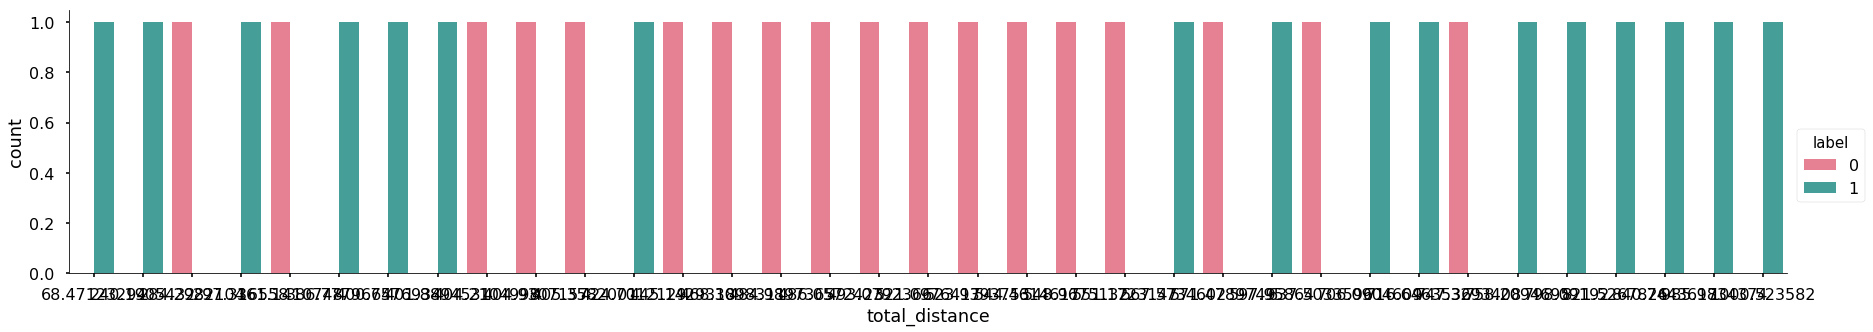

In [20]:
sns.factorplot(x='total_distance', data=mlFeats, hue='label', kind='count', size=5, aspect=5, palette='husl')

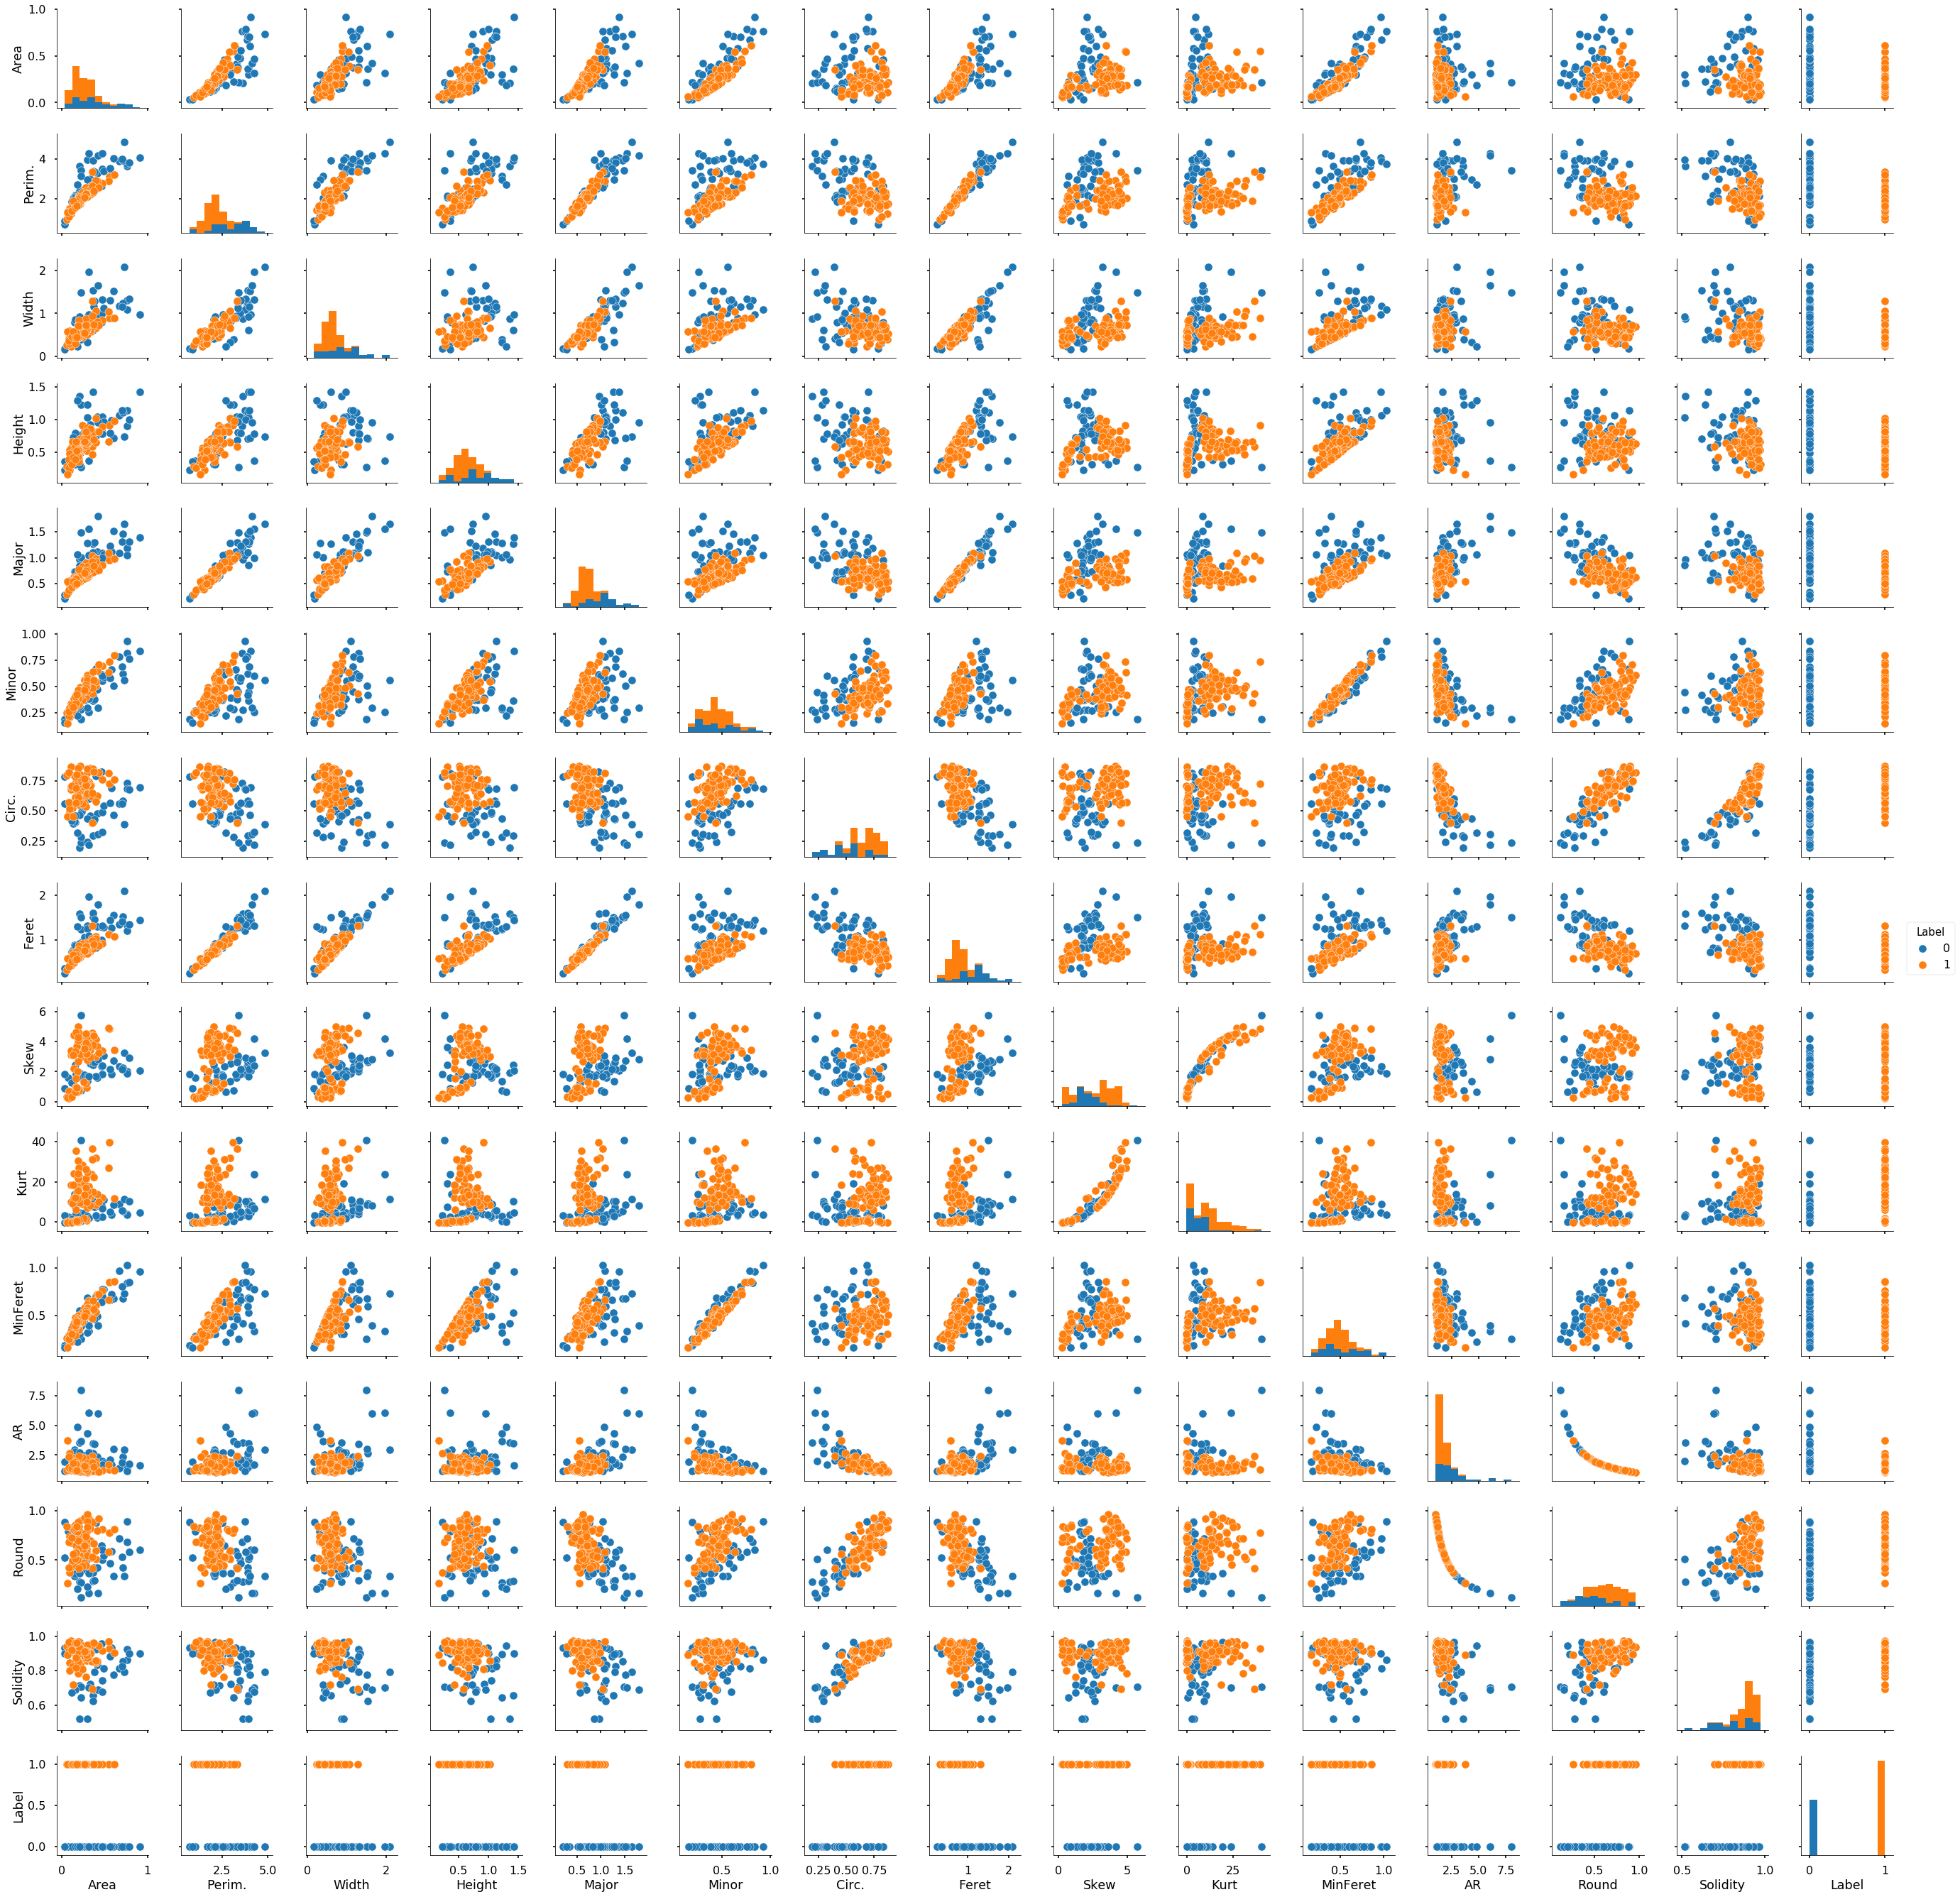

In [141]:
sns.pairplot(data=mlFeats, hue='Label')

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/home/amandap/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
logreg=LogisticRegression()

In [23]:
Y=mlFeats['label']
Y.head()
X=mlFeats.drop('label', axis=1)
X.head()
X.iloc[1:5, 6:14]

,min_speed,avg_speed,MSD_slope,hurst_RS,nongauss,disp_var,disp_skew,rw_linearity
cell_id,,,,,,,,
1,0.282843,6.750795,1.292228,0.814534,0.866332,30.030360,2.561564,0.311134
2,0.282843,7.937208,1.463021,0.863494,0.334856,49.933687,1.407508,-0.157816
3,0.200000,7.276936,0.838334,0.826648,-0.106679,24.167334,0.919680,-0.015067
4,0.200000,6.735969,0.828655,0.823151,0.148357,26.477401,1.414021,-0.211066


In [24]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y)

In [25]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
Y_pred=logreg.predict(X_test)

In [27]:
print("Logistic Regression")
print(metrics.classification_report(Y_test, Y_pred))

Logistic Regression
             precision    recall  f1-score   support

          0       0.50      0.25      0.33         4
          1       0.57      0.80      0.67         5

avg / total       0.54      0.56      0.52         9



Confusion matrix, without normalization
[[1 3]
 [1 4]]


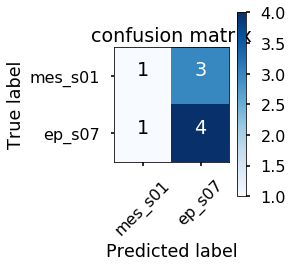

In [28]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    (http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')

plt.show()

## kNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn=knn.predict(X_test)
print("K Nearest Neighbors")
print(metrics.classification_report(Y_test, Y_pred_knn))

K Nearest Neighbors
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00         9



## quick cross-val for logreg and kNN

In [31]:
cv_avgs=[]
from sklearn.model_selection import cross_val_score
n_neighbors=[1,5,10,9, 8]
for i in n_neighbors:
    knn_cv=KNeighborsClassifier(n_neighbors=i)
    cv_scores=cross_val_score(knn_cv, X_train, Y_train, cv=10)
    print(cv_scores)
    cv_avgs.append(cv_scores.mean())
cv_avgs

[ 0.75  0.5   0.67  1.    0.5   0.5   1.    1.    1.    1.  ]
[ 0.5   0.5   0.67  1.    0.5   0.5   0.5   0.5   1.    1.  ]
[ 0.5   0.5   0.67  1.    1.    0.5   0.5   0.5   1.    1.  ]
[ 0.5   0.5   0.67  1.    1.    0.5   0.5   1.    1.    1.  ]
[ 0.5   0.5   0.67  1.    1.    0.5   0.5   1.    1.    1.  ]


[0.79166666666666663,
 0.66666666666666663,
 0.71666666666666656,
 0.76666666666666661,
 0.76666666666666661]

In [32]:
 knn_cv=KNeighborsClassifier(n_neighbors=9)

In [33]:
knn_cv.fit(X_train, Y_train)
Y_pred_cv=knn_cv.predict(X_test)
print("Cross-Val kNN")
print(metrics.classification_report(Y_test, Y_pred_cv))

Cross-Val kNN
             precision    recall  f1-score   support

          0       0.60      0.75      0.67         4
          1       0.75      0.60      0.67         5

avg / total       0.68      0.67      0.67         9



Confusion matrix, without normalization
[[3 1]
 [2 3]]


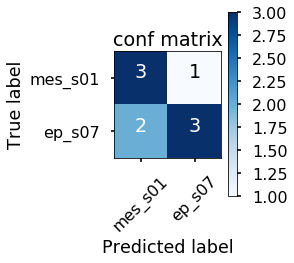

In [35]:
cnf_matrix=metrics.confusion_matrix(Y_test, Y_pred_cv)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='conf matrix')
plt.show()

In [36]:
cv_avgs=[]

In [37]:
C_vals=[.0001, .001, .01, .1, .5, 1, 1.5, 1.1, 1.2, 1.3]
for i in C_vals:
    logreg_cv=LogisticRegression(C=i)
    cv_scores=cross_val_score(logreg_cv, X_train, Y_train, cv=10)
    print(cv_scores)
    cv_avgs.append(cv_scores.mean())
cv_avgs

[ 1.    0.75  0.67  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.75  0.67  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.75  0.33  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.75  0.33  1.    0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.5   0.33  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.5   0.33  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.5   0.33  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.5   0.33  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.5   0.33  0.67  0.5   0.5   0.5   1.    0.5   1.  ]
[ 1.    0.5   0.33  0.67  0.5   0.5   0.5   1.    0.5   1.  ]


[0.70833333333333326,
 0.70833333333333326,
 0.67500000000000004,
 0.70833333333333326,
 0.65000000000000002,
 0.65000000000000002,
 0.65000000000000002,
 0.65000000000000002,
 0.65000000000000002,
 0.65000000000000002]

In [41]:
logreg_cv=LogisticRegression(C=.0001)

In [42]:
logreg_cv.fit(X_train, Y_train)
Y_pred_cv=logreg_cv.predict(X_test)
print("Cross-val LogReg")
print(metrics.classification_report(Y_test, Y_pred_cv))

Cross-val LogReg
             precision    recall  f1-score   support

          0       0.60      0.75      0.67         4
          1       0.75      0.60      0.67         5

avg / total       0.68      0.67      0.67         9



Confusion matrix, without normalization
[[3 1]
 [2 3]]


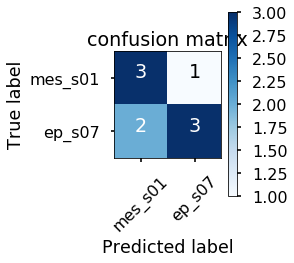

In [43]:
cnf_matrix=metrics.confusion_matrix(Y_test, Y_pred_cv)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

Null error rate: This is how often you would be wrong if you always predicted the majority class.

In [44]:
Y_test.mean() #null error rate

0.5555555555555556

## this time, both did pretty well

## SVM: scale data to [-1,1]!

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [46]:
from sklearn import svm
clf=svm.SVC(kernel="linear", gamma=.001, C=100)
clf=clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
print("SVM")
print(metrics.classification_report(Y_test, Y_pred))

SVM
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         4
          1       0.50      0.80      0.62         5

avg / total       0.28      0.44      0.34         9



Confusion matrix, without normalization
[[0 4]
 [1 4]]


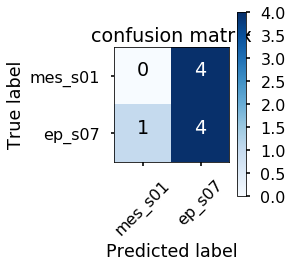

In [47]:
cnf_matrix=metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

## SVM cross val

## nested cross val (GridSearchCV)

In [61]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Set up possible values of parameters to optimize over
p_grid = {"kernel":["sigmoid", "linear", "poly", "rbf"], "C": [0.1, 1, 10, 100, 1000], "gamma":[.0001, .001, .01, .1,1,10,100]}

# We will use a Support Vector Classifier with "rbf" kernel
svr = svm.SVC()

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
inner_cv = KFold(n_splits=4, shuffle=True)
outer_cv = KFold(n_splits=4, shuffle=True)

# Non_nested parameter search and scoring
clf = GridSearchCV(estimator=svr, param_grid=p_grid, cv=inner_cv)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_train, y=Y_train.values.ravel(), cv=outer_cv)

In [62]:
clf.fit(X_train, Y_train.values.ravel())
print(clf.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [63]:
nested_score

array([ 0.57,  0.86,  0.83,  0.67])

### overfitted? because training classifies way better than test

In [64]:
y_pred_clf=clf.predict(X_test)

In [65]:
print("Grid Search")
print(metrics.classification_report(Y_test, y_pred_clf))

Grid Search
             precision    recall  f1-score   support

          0       0.80      1.00      0.89         4
          1       1.00      0.80      0.89         5

avg / total       0.91      0.89      0.89         9



Confusion matrix, without normalization
[[4 0]
 [1 4]]


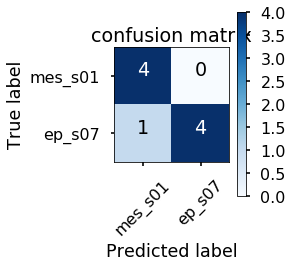

In [66]:
cnf_matrix=metrics.confusion_matrix(Y_test, y_pred_clf)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

## for SVM, it was able to achieve the similar classification, but kNN better

## linear svm

In [54]:
lsv=svm.LinearSVC(C=1, class_weight='balanced', loss='hinge')
lsv.fit(X_train, Y_train)
y_pred_lsv=lsv.predict(X_test)
print("LinearSVM")
print(metrics.classification_report(Y_test, y_pred_lsv))

LinearSVM
             precision    recall  f1-score   support

          0       0.50      0.25      0.33         4
          1       0.57      0.80      0.67         5

avg / total       0.54      0.56      0.52         9



Confusion matrix, without normalization
[[1 3]
 [1 4]]


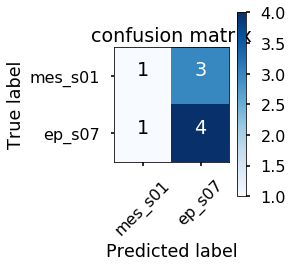

In [55]:
cnf_matrix=metrics.confusion_matrix(Y_test, y_pred_lsv)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Set up possible values of parameters to optimize over
p_grid = {"penalty":["l1", "l2"], "C": [0.1, 1, 10, 100, 1000]}

# We will use a Support Vector Classifier with "rbf" kernel
lsvr = svm.LinearSVC(dual=False, loss='squared_hinge')

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
inner_cv = KFold(n_splits=4, shuffle=True)
outer_cv = KFold(n_splits=4, shuffle=True)

# Non_nested parameter search and scoring
clf = GridSearchCV(estimator=lsvr, param_grid=p_grid, cv=inner_cv)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_train, y=Y_train.values.ravel(), cv=outer_cv)

In [57]:
clf.fit(X_train, Y_train.values.ravel())
print(clf.best_estimator_)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)


In [58]:
nested_score

array([ 0.43,  0.86,  1.  ,  0.67])

In [59]:
y_pred_clf=clf.predict(X_test)
print("Grid Search LinearSVM")
print(metrics.classification_report(Y_test, y_pred_clf))

Grid Search LinearSVM
             precision    recall  f1-score   support

          0       0.50      0.75      0.60         4
          1       0.67      0.40      0.50         5

avg / total       0.59      0.56      0.54         9



Confusion matrix, without normalization
[[3 1]
 [3 2]]


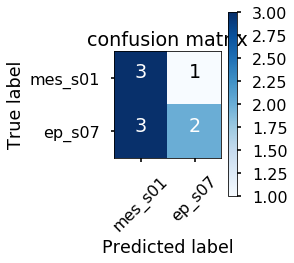

In [60]:
cnf_matrix=metrics.confusion_matrix(Y_test, y_pred_clf)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

## feature selection: use SVM (best so far)

In [67]:
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(clf.best_estimator_, prefit=True)
X_new=model.transform(X_train)
print(X_new.shape)
X_new_test=model.transform(X_test)
print(X_new_test.shape)

ValueError: The underlying estimator SVC has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [71]:
print(X.columns[model.get_support()])

Index(['Major', 'Circ.', 'Feret', 'Kurt'], dtype='object')


In [72]:
lsv_new=svm.LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
lsv_new.fit(X_new, Y_train)
y_pred_lsv_new=lsv_new.predict(X_new_test)
print("Feature Selection LSV")
print(metrics.classification_report(Y_test, y_pred_lsv_new))
print(metrics.accuracy_score(Y_test, y_pred_lsv_new))

Feature Selection LSV
             precision    recall  f1-score   support

          0       0.92      0.92      0.92        12
          1       0.95      0.95      0.95        20

avg / total       0.94      0.94      0.94        32

0.9375


Confusion matrix, without normalization
[[11  1]
 [ 1 19]]


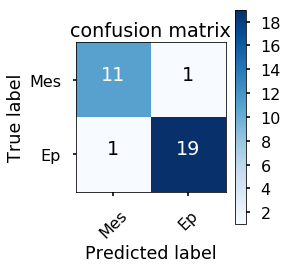

In [73]:
cnf_matrix=metrics.confusion_matrix(Y_test, y_pred_lsv_new)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

## recursive feature elimination

In [81]:
from sklearn.feature_selection import RFE

selector=RFE(lsv_new, 2, step=1)
selector=selector.fit(X_new,Y_train)
y_pred_selected=selector.predict(X_new_test)
print("Recursive Feature Elimination")
print(metrics.classification_report(Y_test, y_pred_selected))
selector.support_
X_new_cols=np.array(['Major', 'Circ.', 'Feret', 'Kurt'])
print(X_new_cols[selector.support_])

Recursive Feature Elimination
             precision    recall  f1-score   support

          0       0.88      0.58      0.70        12
          1       0.79      0.95      0.86        20

avg / total       0.82      0.81      0.80        32

['Major' 'Circ.']


Confusion matrix, without normalization
[[ 7  5]
 [ 1 19]]


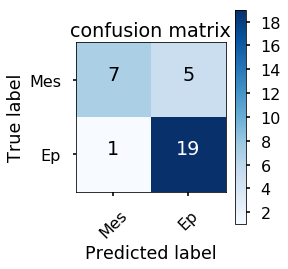

In [76]:
cnf_matrix=metrics.confusion_matrix(Y_test, y_pred_selected)
plt.figure(figsize=(4,4))
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=False,
                      title='confusion matrix')
plt.show()

"Order" of important features:

Major

Circ

Feret

Kurt 

# Get more data.

In the course of developing this pipeline, i redid the 'train test split' multiple times to widely varying results. This means that depending on which subsest gets put into training and testing sets, i can achieve better or worse classification. I think this means I need more data.